# Day 15 Pre-Class Assignment: Making Predictions Using Data


## Goals for today's assignment

* Describe the utility of fitting trendlines to data, in the context of making predictions about the future
* Use best-fit lines to make predictions about future values
* Quantitatively and qualitatively describe how to determine the Goodness of fit for a given line

---
## 1. Predicting Future Trends

Consider the following dataset showing salinity of water (amount of salt in the water) versus depth for an imaginary body of water:



<br/>
<img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-S22-data/main/Day-15/Fancy_Plot_Salinity.jpg" alt="Curve-fitting" width=700px/>

&#9989;&nbsp; **1.1** What would you guess the salinity would be at a depth of 6 meters? At 7 meters?  What makes you think those would be the values?

<font size=+3>&#9998;</font> *6,13.5 and 7, 16.Following a roughly linear trend, its about 2.5 ppt/meter*


&#9989;&nbsp; **1.2** Now, make a line connecting the *first* and *last* points and continue it out to a depth of 7 meters. Using the line, predict what the salinity would be at a depth of 6 and 7 meters. You may find it useful to hold a straight edge up to your screen (e.g. piece of paper, pen, pencil) to trace out this line.

<font size=+3>&#9998;</font> *13.5and 16*


&#9989;&nbsp; **1.3** How do the values you determined using your line compare with the values you predicted in 1.1?

<font size=+3>&#9998;</font> *Super close!*


---
## 2. Determining the Line of Best Fit 

Consider the figure below, which shows the same data set, but with two lines. 


<br/>
<img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-S22-data/main/Day-15/Fancy_Plot_Salinity_Fake_Lines.jpg" alt="Curve-fitting" width=700px/>

&#9989;&nbsp; **2.1** Without doing any calculations (i.e., just looking at the figure), do you think the salinity at a depths of 6 and 7 meters will be closer to values in line 1 or line 2? What is it about that particular line that makes you think it will be more accurate in predicting future values?

<font size=+3>&#9998;</font> *Line 1 passes through more dots and follows the trend closer*


&#9989;&nbsp; **2.2** Imagine someone asks you to show *quantitatively* that the line you have selected will be more accurate in predicting future values. What is a way you could quantitatively measure how well a line fits some dataset?

Try to come up with an algorithm--that is, a detailed procedure, like a recipe--for calculating how well a line fits a dataset.

<font size=+3>&#9998;</font> *0.5+2.2x for x = depth in meters*


&#9989;&nbsp; **2.3** Now try to apply your algorithm (by hand) to the lines and data from the figure above. Does the line you choose in part 2.1 fit the data the best according to your algorithm?

The data values and the values for the two lines are provided.

In [1]:
import numpy as np

x_data = np.array([0,1,2,3,4,5])
y_data = np.array([0.5,2.6,3.2,7.7,8.2,11.9])
y_values_line_1 = np.array([2.2, 4.15, 6.1, 8.05, 10., 11.95, 13.9, 15.85])
y_values_line_2 = np.array([5., 6.6, 8.2, 9.8, 11.4, 13., 14.6, 16.2])

<font size=+3>&#9998;</font> *.5, 2.7,*


---
## 3. Using a Computer to Fit a Line 

In the questions and exercises above, you were asked to think through how one might determine the "best fit" line that matches the data you were presented with. In the previous pre-class and in-class assignments, we explored how we can use code written from scratch as well as a pre-written Python tool from the SciPy package called `curve_fit`, to fit a mathematical function to data. We’ll be using this extensively in class, so it’s important that you spend some more time trying to get a better idea of how it works.

**Note:** By "fitting a function", we mean that there is a function that contains parameters that we can adjust to find the expected values that fit the data the best (hence finding the "best fit"). 

To use `curve_fit`, you need a minimum of two things:
- A (Python) function that contains the mathematical function you are fitting to your data
- A dataset, consisting of x and y values, that you are fitting your mathematical function to.

Let’s look at an example.

Below is a set of *x* and *y* values, and we want to fit the following function:

$$y = A \sin(Bx + C)$$

&#9989;&nbsp; **3.1** What parameters are we adjusting to find the best fit for this function? 

<font size=+3>&#9998;</font> *amplitude, spread, and horizontal shift.*


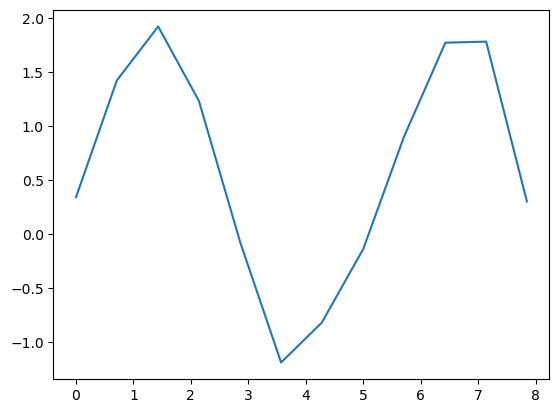

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([0.00, 0.71, 1.43, 2.14, 2.86, 3.57, 4.28, 5.00, 5.71, 6.43, 7.14, 7.85])
y = np.array([0.34, 1.42, 1.92, 1.23, -0.08, -1.19, -0.82, -0.14, 0.90, 1.77, 1.78, 0.30])

plt.plot(x,y)

To get started with finding our fit, we first define a Python function that contains the mathematical function we’re fitting.

In [3]:
def sin_function(x, A, B, C):
    return A * np.sin(B * x + C)

We now have the two pieces needed to use `curve_fit`, the function we're using and the data we're trying to fit, so let’s run it and see what we get.

In [4]:
from scipy.optimize import curve_fit

best_fit_parameters, just_ignore_this_for_now = curve_fit(sin_function, x, y)
print(best_fit_parameters)

[1.64659542 1.17088966 0.0770739 ]


If we look at the [documentation for `curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), we see that by this calling function, we get two return values by default: `popt` and `pcov`. `popt` contains the best fit parameters. **You do not need to worry about `pcov`** for the purposes of this assignment, but you are encourage to read the documentation for a description of what `pcov` is.  

In the code above, `popt` was stored in the `best_fit_parameters` variable, and `pcov` was stored in `just_ignore_this_for_now`. 

If we want to see what our best fit line looks like using our best fit parameters, we can use the following code:

In [5]:
A_expected = best_fit_parameters[0]  
B_expected = best_fit_parameters[1]
C_expected = best_fit_parameters[2]

y_expected = sin_function(x, A_expected, B_expected, C_expected)

&#9989;&nbsp; **3.2** Give a brief explanation for what the last line of code is doing in the cell above.

<font size=+3>&#9998;</font> *Put your answer here.*


Now we can try to plot both the data and our best fit model values.

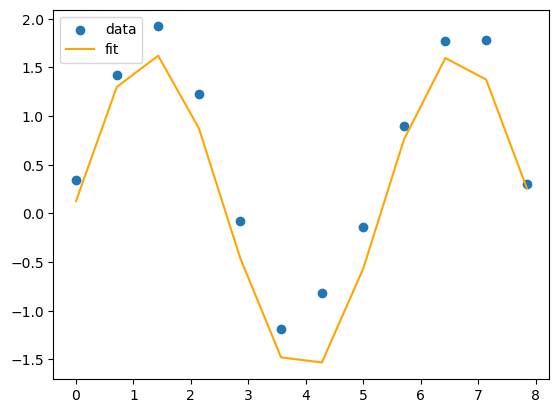

In [6]:
plt.scatter(x, y, label = "data")
plt.plot(x, y_expected, color = "orange", label = "fit")
plt.legend()

### YOUR TURN

One of the simplest functions you can have is a straight line, which takes the form:

$$y = A x + B$$

&#9989;&nbsp; **3.3** What parameters would we adjust to find the best fit for this function? 

<font size=+3>&#9998;</font> *Put your answer here.*


&#9989;&nbsp; **3.4** Fit a straight line to the x and y dataset provided below. Specify what the best fit parameters are and make a plot showing your best fit line.

In [7]:
x = np.array([0,1,2,3,4,5])
y = np.array([0.5,2.6,3.2,7.7,8.2,11.9])

#Put your code here


## 4. Determining Goodness of Fit

&#9989;&nbsp; **4.1** Compare your the best fit line you just found to the "best fit" line provided in Section 2. Which one appears to fit the data better? 

<font size=+3>&#9998;</font> *Put your answer here.*


&#9989;&nbsp; **4.2** Try to turn the algorithm you described in part 2.2 for measuring how well a line fits the data into code and apply it to the new best fit line that you just found using `curve_fit`. How does this value for goodness of fit compare to the one you found in part 2.3?  

In [8]:
#Put your code here


<font size=+3>&#9998;</font> *Put your answer here.*


---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [9]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

Copyright &#169; 2023, [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu/) at Michigan State University, All rights reserved.